# Gathering Data

> Import data from twitter API, archived twitter data, and an image predicter file hosted on Udacity's server

In [522]:
import pandas as pd
import requests
import tweepy
import json
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [42]:
# Importing twitter archive data
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [43]:
# Checking to see that it loaded ok
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [44]:
# Importing image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)
    
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [45]:
# Checking to see that it loaded OK
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
# Set up connection to Twitter API
consumer_key = '06QAUJ68GEw1X1HAmnlpWbI1v'
consumer_secret = 'RNEA6jYHrsVYl3hHXR9weNzR0u4M2LAi9BKqovh2et2Vz3nAMp'
access_token = '1126156144605519872-dAheoH7oBTI4KD80f7qY9Syi516LnF'
access_secret = '0jUUt20L5Qw0cpskxNcIgNjPPeSXyttTddZ7iXTWXRRll'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [47]:
# Query Twitter API data base for information on various tweets

#start = time.time()
with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in twitter_df['tweet_id']:
        try:
            info = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(info._json, file)
            #end = time.time()
            #print(end - start)
            file.write('\n')
        except:
            continue

> Inspected the file by opening the file in the workspace. Made sure each id was written on a different line

In [48]:
# Read contents from 'tweet_json.txt' into a dictionary for each line using json.loads method
all_tweets = []

with open('tweet_json.txt', 'r', encoding='utf8') as json_file:  
    for entry in json_file:
        line = json.loads(entry)
        all_tweets.append(line)


In [49]:
# Making sure all the tweets were loaded (there were 883 entries in the tweet_json.txt file)
len(all_tweets)

883

In [50]:
# Save the id, retweet_count, and favorites_count for each tweet into a separate in a dictionary
tweetdata = []
for i in range(len(all_tweets)):
    id_tweet = all_tweets[i]['id']
    retweet_count = all_tweets[i]['retweet_count']
    favorite_count = all_tweets[i]['favorite_count']
    tweetdata.append({'id': id_tweet, 'retweets': retweet_count, 'favorites': favorite_count})


In [51]:
# Create DataFrame from tweetdata
counts_df = pd.DataFrame(tweetdata, columns = ['id', 'retweets', 'favorites'])
counts_df.head()

,id,retweets,favorites
0,892420643555336193,8190,37551
1,892177421306343426,6058,32278
2,891815181378084864,4008,24319
3,891689557279858688,8338,40904
4,891327558926688256,9039,39100


In [52]:
# Checking that there is no missing data
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
id           883 non-null int64
retweets     883 non-null int64
favorites    883 non-null int64
dtypes: int64(3)
memory usage: 20.8 KB


# Assesing Data

> Now that we have all the information we want stored in our 3 data tables (twitter_df, images_df, counts_df) we can assess them visually and note some of the problems we see. Be on the lookout for both quality and tidyness issues

**twitter_df**

In [53]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [54]:
twitter_df.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [55]:
twitter_df['text'][2339]

'Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'

In [56]:
twitter_df[twitter_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [57]:
twitter_df.text[1351]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [58]:
twitter_df[twitter_df['name'] == 'a']['text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

all above entries should have "None" for name

In [59]:
twitter_df.name.value_counts(ascending=False)

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Bailey          7
Buddy           7
Toby            7
an              7
Jax             6
Leo             6
Milo            6
Bella           6
Oscar           6
Jack            6
Koda            6
Rusty           6
Dave            6
Scout           6
Stanley         6
Larry           5
             ... 
Berkeley        1
Mingus          1
Meera           1
Wishes          1
Carll           1
Obi             1
Devón           1
Jazz            1
Sprout          1
Stephanus       1
Iggy            1
Glenn           1
Eleanor         1
Pupcasso        1
Trip            1
Vince           1
Remy            1
Ole             1
Emmie           1
Lolo            1
Robin           1
Fillup          1
this            1
Rizzo           1
Binky     

Notice 'an' and 'such' are also names. All the other names are capitalized, so we could use this as an indicator to sort through it

In [60]:
#pd.options.display.max_colwidth = 100
badnames_df = twitter_df[twitter_df['name'].str.capitalize() != twitter_df['name']].head(115)
badnames_df['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
CeCe             2
not              2
getting          2
actually         2
mad              2
JD               1
DonDon           1
space            1
light            1
unacceptable     1
DayZ             1
BeBe             1
old              1
his              1
by               1
such             1
infuriating      1
this             1
life             1
officially       1
all              1
my               1
incredibly       1
Name: name, dtype: int64

We See this caught most of the random cases. Just remember to ignor JD, DayZ, DonDon, CeCe, and BeBe

In [61]:
badnames_df = twitter_df[(twitter_df['name'].str.capitalize() != twitter_df['name']) & (twitter_df['name'] != 'CeCe') & (twitter_df['name'] != 'BeBe') & (twitter_df['name'] != 'DonDon') & (twitter_df['name'] != 'DayZ') & (twitter_df['name'] != 'CeCe') & (twitter_df['name'] != 'JD')]
pd.options.display.max_colwidth = 100
print(badnames_df.shape[0])
badnames_df['name'].value_counts()
#badnames_df['text']


109


a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
getting          2
mad              2
not              2
infuriating      1
by               1
light            1
this             1
life             1
officially       1
such             1
space            1
unacceptable     1
old              1
my               1
his              1
all              1
incredibly       1
Name: name, dtype: int64

It looks like this subsection of 109 bad names are the ones we will have to sort through to see if there is any problem for incorrectly given names. We will also have to go through certain cells were there were no names given, and see how if we can solve these

In [62]:
twitter_df[twitter_df['text'].str.contains('name is')]['text']

35                                  I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
168     Sorry for the lack of posts today. I came home from school and had to spend quality time with my...
843     His name is Charley and he already has a new set of wheels thanks to donations. I heard his top ...
852     This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 ...
1678    We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 1...
1734    This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 wou...
2267    Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af....
2287    This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by...
2313    This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amuse...
Name: text, dtype: object

In [63]:
twitter_df['name'][843]

'None'

In [64]:
twitter_df[twitter_df['name'] == 'None'].shape[0]

745

In [65]:
# All of these can be None's
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('Here we have a')]['text']

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...
37      Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero...
170     Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blu...
440     Here we have a doggo who has messed up. He was hoping you wouldn't notice. 11/10 someone help hi...
1624    Here we have a basking dino pupper. Looks powerful. Occasionally shits eggs. Doesn't want the ho...
1843    Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co...
2166    Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would h...
2227    Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner....
2281    Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/...
2299    Here we have a Huffl

In [66]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('named')]['text']

603     RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply ...
2166    Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would h...
2227    Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner....
2269    This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles htt...
Name: text, dtype: object

In [67]:
pd.options.display.max_colwidth = 150
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('name is')]['text']

35                                                                                    I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
168     Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...
843               His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley
1678                   We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT
1734                This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP
2267                 Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm
Name: text, dtype: object

In [68]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('called')]['text']

2305    My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10 https://t.co/xYGdBrMS9h
Name: text, dtype: object

In [69]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('this is')]['text']

204            RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…
349     I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https...
498                       I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10
784              RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
841              RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…
887              We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi
893             No no no this is all wrong. The Walm

In [70]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('here is')]['text']

101             RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…
164    Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co...
857                                                                        @TheEllenShow I'm not sure if you know this but that doggo right there is a 12/10
911                                     RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. https://t.co/7boff8zojZ
Name: text, dtype: object

In [71]:
twitter_df.loc[0]['name']

'Phineas'

>This should hopefully be enough for now. We will likely have to iterate on the rest of the None's to see if we can figure out more patterns. But this is a solid start for understanding how to convert the bad names like 'an', 'a', etc. to None, and then we have to sort through None seemingly somewhat manually. I do not know algorithms to search through this data

Issues we encountered:
* timestamp should be datetime not string
* Retweeted status timestamp should be datetime not string
* doggo, floofer, puppo, and puppo should all be in one column called "fun_dog_name"
* "fun_dog_name" can then each answer can be the type of dog. This data can also then be categorical
* Change in_reply_to_status_id to int so that the whole id shows and it is not rounding the number off
* Certain dogs have incorrect rating_numerator and rating_denomintor ratings due to confusing fractions within tweets (or multiple). Will have to sort through this
* Some names aren't real names (1351). Check to make sure all the names in name column are real names, if not, investigate.
* pupper, puppo, floofer, and doggo don't seem to handle plurals well (1351 again). Check if the plural of these lands within the string

**Now let's look at image_df**

In [72]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [73]:
image_df.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


* .info() says there are 2075 entries which is less than 2356 so there are some missing images

**Now let's look at counts_df**

In [74]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
id           883 non-null int64
retweets     883 non-null int64
favorites    883 non-null int64
dtypes: int64(3)
memory usage: 20.8 KB


In [75]:
counts_df.head()

,id,retweets,favorites
0,892420643555336193,8190,37551
1,892177421306343426,6058,32278
2,891815181378084864,4008,24319
3,891689557279858688,8338,40904
4,891327558926688256,9039,39100


Things we notice:
* This data is incomplete (883 vs. 2356)
* This information can be added onto the twitter_df table and joined through the id column

Summarizing... 

#### Quality
##### `twitter_df` table
* timestamp should be datetime not string
* Retweeted status timestamp should be datetime not string
* Change in_reply_to_status_id to int (so it is not rounding the number off) -- Might not be able to do this due to Nan values needing to be stored as floats
* Certain dogs have incorrect rating_numerator and rating_denomintor ratings due to confusing fractions within tweets (or multiple). Will have to sort through this
* Some names aren't real names (1351). Check to make sure all the names in name column are real names, if not, investigate if their is a name and how to put it in
* Some names say 'None' but they do have names in the text. Will have to figure out how to search for names
* pupper, puppo, floofer, and doggo don't seem to handle plurals well (1351 again). Check if the plural of these lands within the string
* Retweets of same entries should not be in table (ex: 204 and 349, 2269 and 603) -- **<u>Found while trying to fix a different problem, see below!</u>**

##### `image_df` table
* Not all tweets have images (2075 vs 2356)

##### `counts_df` table
* Incomplete data (only 883 entries, but not sure if we can fix this)

#### Tidiness
* in `twitter_df` doggo, floofer, puppo, and puppo should all be in one column called "dog_stage"
* information in `counts_df` and `images_df`can be added to `twitter_df` by matching on tweet


# Clean

In [76]:
# Creating copies of the dataFrames to leave originals untouched
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
counts_clean = counts_df.copy()

#### All "dog_stages" should be in one column and missing dog_stage names

##### Define


2 options:
- Use the melt function on the `twitter_clean` dataFrame to merge all of the columns into one. However then we would end up with a bunch of 'None' columns and some of these have names (like 'puppers' not registering as 'pupper')
- Parse the text column yourself, to make find all the errors, and then delete the other columns

**Using second option after 1st failed**

##### Code

In [77]:
# The following code should extract the strings from the appropriate text in the twitter_clean dataFrame. Should also
# be able to handle plurals, which seemingly failed before
twitter_clean['dog_stage'] = twitter_clean['text'].str.extract( '(puppo|doggo|pupper|floofer)')

##### Test

In [78]:
twitter_clean[twitter_clean['tweet_id'] == 704054845121142784]  # row 1351, where previously puppers was not caught


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,None,None,None,None,pupper


In [79]:
# So it looks like it can handle plurals, let's check how the other columns faired
twitter_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398133547008,13,10,None,None,None,None,None,NaN
58,880935762899988482,NaN,NaN,2017-06-30 23:47:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880935762899988482/photo/1,13,10,Louis,None,None,None,None,NaN
555,803692223237865472,NaN,NaN,2016-11-29 20:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: I present to you... Dog Jesus. 13/10 (he could be sitting on a rock but I doubt it) https://t.co/fR1P3g5I6k,6.914169e+17,4.196984e+09,2016-01-25 00:26:41 +0000,"https://twitter.com/dog_rates/status/691416866452082688/photo/1,https://twitter.com/dog_rates/status/691416866452082688/photo/1",13,10,None,None,None,None,None,NaN
456,818259473185828864,NaN,NaN,2017-01-09 00:53:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Florence. He saw the same snap you sent him on your story. Pretty pupset with you. 12/10 https://t.co/rnkvT2kvib,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818259473185828864/photo/1,12,10,Florence,None,None,None,None,NaN
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/752660715232722944/photo/1,https://twitter.com/dog_rates/status/752660715232722944/photo/1",10,10,None,doggo,None,None,None,NaN
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None,NaN
1003,747844099428986880,NaN,NaN,2016-06-28 17:28:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747844099428986880/photo/1,11,10,Huxley,None,None,None,None,NaN
1579,687312378585812992,NaN,NaN,2016-01-13 16:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""You got any games on your phone"" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q",NaN,NaN,NaN,https://twitter.com/dog_rates/status/687312378585812992/photo/1,7,10,None,None,None,pupper,None,pupper
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694511734784/photo/1,12,10,Gus,None,None,pupper,None,pupper
1470,694001791655137281,NaN,NaN,2016-02-01 03:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chester. He's a Benefloof Cumberbark. Fabulous ears. Ni

Seems like we got them :), now we can delete doggo, floofer, pupper, puppo columns

In [80]:
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

In [81]:
twitter_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and s

#### Not real names such as 'a' and 'my'. Additionally fixing entries where the name is 'None' but there is a name hidden in the text

##### Define


From earlier observation we saw:
* All names that weren't real names were lower case. So the first thing we can do is convert all the lower case names (i.e. 'a', 'an', and all that garbage to 'None', minus the 4 exceptions found earlier
* Then we have to change the 'None' entries where there are names. This is hard to catch, but start by manually changing the errors found in the assessing section and then we can sample the data again, to asses once more

##### Code

In [103]:
# First change the bad name's to 'None'
pd.options.display.max_colwidth = 150
bad_names = twitter_df[(twitter_df['name'].str.capitalize() != twitter_df['name']) & (twitter_df['name'] != 'CeCe') & (twitter_df['name'] != 'BeBe') & (twitter_df['name'] != 'DonDon') & (twitter_df['name'] != 'DayZ') & (twitter_df['name'] != 'CeCe') & (twitter_df['name'] != 'JD')]['name'].value_counts().index.tolist()
for i in range(len(twitter_clean)):
    if twitter_clean.loc[i]['name'] in bad_names:
        twitter_clean.at[i,'name'] = 'None'
        

In [105]:
# Check to make sure only the weird double capitalized names are left
twitter_clean[(twitter_clean['name'].str.capitalize() != twitter_clean['name'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
652,792394556390137856,NaN,NaN,2016-10-29 15:55:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet BeBe. She rocks the messy bun of your dreams. H*ckin flawless. 12/10 would watch her tutorial https://t.co/of0pFNBIl8,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792394556390137856/photo/1,https://twitter.com/dog_rates/status/792394556390137856/photo/1",12,10,BeBe,NaN
827,769212283578875904,NaN,NaN,2016-08-26 16:37:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is DonDon. He's way up but doesn't feel blessed. Rather uncomfortable actually. 12/10 I'll save you DonDon https://t.co/OCYLz3fjVE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/769212283578875904/photo/1,12,10,DonDon,NaN
1412,698953797952008193,NaN,NaN,2016-02-14 19:35:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet CeCe. She wanted to take a selfie before her first day as a lumberjack. 11/10 crushing traditional gender roles https://t.co/oW9XMYG3F4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698953797952008193/photo/1,11,10,CeCe,NaN
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is CeCe. She's patiently waiting for Santa. 10/10 https://t.co/ZJUypFFwvg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482581123072/photo/1,10,10,CeCe,NaN
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985629241344/photo/1,10,10,JD,NaN
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to DayZ. She is definitely stuck on that stair. Just looking for someone to help her. 11/10 I would help https://t.co/be3zMW0Qj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044826800133/photo/1,11,10,DayZ,NaN


In [106]:
# Now everything is set to None that isn't a real name. However these None's may yet still contain real names.
# Look through 'None' list and append column # with names to a dict. will update all at once
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('named')]['text']


603            RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
2166       Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m
2227    Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN
2269                          This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
Name: text, dtype: object

> Also see above that there are 2 duplicate entries! We can add this to our list of things to be clean. (2269 and 603)

In [117]:
missed_names = {603: 'Tickles', 2166: 'Zeus', 2227: 'Guss', 2269: 'Tickles'}

In [119]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('name is')]['text']

35                                                                                    I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
168     Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t...
843               His name is Charley and he already has a new set of wheels thanks to donations. I heard his top speed was also increased. 13/10 for Charley
1678                   We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT
1734                This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP
2267                 Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm
Name: text, dtype: object

In [121]:
missed_names.update({35 : 'Howard', 168: 'Zoey', 843: 'Charley', 1678: 'Thea', 1734: 'Sabertooth', 2267: 'Big Jumpy Rat'} )


{603: 'Tickles',
 2166: 'Zeus',
 2227: 'Guss',
 2269: 'Tickles',
 35: 'Howard',
 168: 'Zoey',
 843: 'Charley',
 1678: 'Thea',
 1734: 'Sabertooth',
 2267: 'Big Jumpy Rat'}

In [122]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('this is')]['text']

204            RT @dog_rates: I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t…
349     I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https...
498                       I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10
784              RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
841              RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…
887              We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi
893             No no no this is all wrong. The Walm

In [124]:
# Repeat entry 204 and 339.
missed_names.update({204 : 'Blue', 349 : 'Blue', 784 : 'Bretagne', 1068: 'Bretagne', 1842 : 'Yoshi'})
missed_names

{603: 'Tickles',
 2166: 'Zeus',
 2227: 'Guss',
 2269: 'Tickles',
 35: 'Howard',
 168: 'Zoey',
 843: 'Charley',
 1678: 'Thea',
 1734: 'Sabertooth',
 2267: 'Big Jumpy Rat',
 204: 'Blue',
 349: 'Blue',
 784: 'Bretagne',
 1068: 'Bretagne',
 1842: 'Yoshi'}

In [125]:
twitter_df[(twitter_df['name'] == 'None') & twitter_df['text'].str.contains('here is')]['text']

101             RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…
164    Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co...
857                                                                        @TheEllenShow I'm not sure if you know this but that doggo right there is a 12/10
911                                     RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. https://t.co/7boff8zojZ
Name: text, dtype: object

In [128]:
missed_names.update({101 : 'Penelope'})

>There are probably more that I have missed but for now this is a good start. Run through the dictionary to correct the dog names on these instances

In [136]:
# Loops through this dictionary and replaces the missed names
for i in missed_names:
    twitter_clean.at[i,'name'] = missed_names[i]

##### Test

In [138]:
# We should see the Penelope entry gone as a sanity check
twitter_clean[(twitter_clean['name'] == 'None') & twitter_clean['text'].str.contains('here is')]['text']

164    Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co...
857                                                                        @TheEllenShow I'm not sure if you know this but that doggo right there is a 12/10
911                                     RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. https://t.co/7boff8zojZ
Name: text, dtype: object

#### Problem to fix

##### Define


In the last part of the cleaning we saw a lot of **retweet entries**. Let's get rid of those. Search twitter_clean['text'] for strings that start with 'RT @', and then drop these columns

##### Code

In [142]:
twitter_clean.shape[0] # initial size

2356

In [144]:
twitter_clean[twitter_clean['text'].str.startswith('RT @')].shape[0] # duplicate entries

181

In [148]:
twitter_clean = twitter_clean[~twitter_clean['text'].str.startswith('RT @')]

##### Test

In [170]:
twitter_clean.shape[0] # math adds up

2175

#### Problem to fix

##### Define


Change timestamp to a datetime object

##### Code

In [172]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

##### Test

In [173]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(6)
memory usage: 334.9+ KB


#### Problem to fix

##### Define


Change retweeted_status_timestamp to datetime object

##### Code

In [174]:
twitter_clean.retweeted_status_timestamp = pd.to_datetime(twitter_clean.retweeted_status_timestamp)

##### Test

In [175]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 334.9+ KB


#### Problem to fix

##### Define


dog_stage should be categorical data

##### Code

In [176]:
twitter_clean.dog_stage = twitter_clean.dog_stage.astype('category')

##### Test

In [205]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null category
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 320.2+ KB


#### Problem to fix

##### Define


Add data from `images_clean` and `counts_clean` into `twitter_df`. Join on the "tweet_id" column

##### Code

> I'm going to use a left join on twitter_clean, because I think it is important to keep the tweets that have been cleaned, even if those tweets do not have corresponding pictures for them. We can always use a subset of this dataset if we want to just look at tweets with the images

In [220]:
# Join images_clean
twitter_clean = pd.merge(twitter_clean, image_clean, on=['tweet_id'], how='left')


In [235]:
#Join counts_clean
counts_clean.rename(columns={'id':'tweet_id'}, inplace=True)
twitter_clean = pd.merge(twitter_clean, counts_clean, on=['tweet_id'], how='left')


##### Test

In [236]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     364 non-null category
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf        

> It's ok that not all of the data from `images_clean` and `counts_clean` moved over to the `twitter_clean` table as we primarily care about all the entries where we have the data for tweet, the images and counts come second. The remainder could have fallen under some of the retweets we dropped from the table earlier as well

#### Problem to fix

##### Define


Ratings that have incorrect values

##### Code

In [245]:
#twitter_clean.rating_numerator.value_counts().index.to_list()
twitter_clean.rating_numerator.value_counts()


12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [308]:
twitter_clean[twitter_clean['rating_numerator'] == 75].text # should be 9.75 not 75
twitter_clean[twitter_clean['rating_numerator'] == 27].text # should be 11.27 not 27
twitter_clean[twitter_clean['rating_numerator'] == 960].text # should be 13/10, check that denom values are ok
twitter_clean[twitter_clean['rating_numerator'] == 50].text # should be 11/10
twitter_clean[twitter_clean['rating_numerator'] == 24].text # no rating
#twitter_clean[twitter_clean['rating_numerator'] == 26].text # should be 11.26
#twitter_clean[(twitter_clean['rating_numerator'] == 5) & (twitter_clean['tweet_id'] == 883482846933004288)].text # should be 13.5 not 5




429    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

> Basically we see that the algorithm didn't handle decimals very well. We can try and come up with a new algorithm that searches for decimals before fractions, or we can fix the individual instances of this

> In order to handle decimals, both the rating_numerator and rating_denominator type will have to be changed to floats

In [301]:
pd.set_option('display.max_colwidth', -1)
twitter_clean.loc[twitter_clean['rating_numerator'] == 75, ['rating_numerator']] = 9.75
twitter_clean.loc[twitter_clean['rating_numerator'] == 27, ['rating_numerator']] = 11.27
twitter_clean.loc[twitter_clean['rating_numerator'] == 50, ['rating_denominator']] = 10
twitter_clean.loc[twitter_clean['rating_numerator'] == 50, ['rating_numerator']] = 11
twitter_clean.loc[twitter_clean['rating_numerator'] == 960, ['rating_denominator']] = 10
twitter_clean.loc[twitter_clean['rating_numerator'] == 960, ['rating_numerator']] = 13
twitter_clean.loc[twitter_clean['rating_numerator'] == 26, ['rating_numerator']] = 11.26
twitter_clean.loc[twitter_clean['tweet_id'] == 883482846933004288,['rating_numerator']] = 13.5

In [312]:
# drop entry with rating_numerator of 24, as this is not a real rating, it is merely used to say 24/7 in the entry, 
# and our data should only contain entries with ratings.
twitter_clean = twitter_clean[twitter_clean['rating_numerator'] != 24]

2174

In [313]:
# Change denominator to float as well that way they are both the same value types (numerator and denominator)
twitter_clean.rating_denominator = twitter_clean.rating_denominator.astype(float)

##### Test

In [315]:
twitter_clean.shape[0] # should be 2174

2174

In [314]:
twitter_clean.info() # data types should be floats for rating columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2174 non-null datetime64[ns, UTC]
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2174 non-null float64
rating_denominator            2174 non-null float64
name                          2174 non-null object
dog_stage                     364 non-null category
jpg_url                       1993 non-null object
img_num                       1993 non-null float64
p1                            1993 non-null object
p1_conf    

#### Problem to fix

##### Define


Some ratings are wrong due to multiple fractions being included in the text entry and it only picks up the first entry. Try and find these entries and then fix the cases that are wrong.

##### Code

In [319]:
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
# Entries with multiple fractions given, ie two dog entries or they referenced a date (often 4/20) Visually
# scanned through them and will replace all the entries that are clearly off


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


52      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                        
263     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                 
619     "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                
832     This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ                   
890     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ       
987     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                   
1024    This is Bluebert. He just saw that both #FinalFur match 

In [327]:
entries_R = [52,890,1024,1483]
numerator_R = [13,14,11,10]
# All denominators should be 10
k = 0
for i in entries_R:
    twitter_clean.at[i,'rating_numerator'] = numerator_R[k]
    twitter_clean.at[i,'rating_denominator'] = 10
    k = k+1

##### Test

In [328]:
for i in entries_R:
    print(twitter_clean.loc[i,'rating_numerator'])
    print(twitter_clean.at[i,'rating_denominator'])

13.0
10.0
14.0
10.0
11.0
10.0
10.0
10.0


#### There is definitely more that we could clean our data for. I am positive that there are other ratings in here that are off and more things that we could fix. However, as far as taking care of the "bigger" problems, I believe we have done that and now we can save our data to a csv file.

> For the actual analysis, we probably will only use the data where we have images for all the tweets (i.e. this data will be a subsection of the data shown here) but I wanted to save all the tweets that had ratings as well. We could have gotten around this by doing an inner join earlier, but like I said, I felt it would be good to keep this information

In [329]:
# Store data in csv file
twitter_clean.to_csv('twitter_archive_master.csv')

# Analysis

#### Now it is time to create some graphics using the data we have found. Some interesting things to look at would be
* Type of dog (according to p1) and it's associated rating. See if there is a "cutest" dog across the board
* See which type of dog is tweeted the most
* Look at the average rating overtime and see if it has gone up or down

 To answer the first question let's look at only the subsection of our data where the dogs have an associated p1

In [370]:
main_df = twitter_clean[pd.isna(twitter_clean.p1) == False].copy()
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null datetime64[ns, UTC]
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1993 non-null object
dog_stage                     326 non-null category
jpg_url                       1993 non-null object
img_num                       1993 non-null float64
p1                            1993 non-null object
p1_conf    

#### Now main_df is just the data that includes tweets that have a corresponding image.  <br>
Let's answer question 2 first: <i> Which dog was tweeted the most? </i> Create a simple bar graph to try and find the answer to this question

In [402]:
new_index = range(0,1992)
#main_df.set_index(new_index)

In [537]:
# Get the value counts for all the dog columns, making sure each column is a dog
dog_counts1 = main_df[main_df['p1_dog'] == True].p1.value_counts().to_list() 
dog_list1 = main_df[main_df['p1_dog'] == True].p1.value_counts().index. to_list() 
dog_counts2 = main_df[(main_df['p1_dog'] == False) & (main_df['p2_dog'] == True)].p2.value_counts().to_list()
dog_list2 = main_df[(main_df['p1_dog'] == False) & (main_df['p2_dog'] == True)].p2.value_counts().index.to_list() 
dog_counts3 = main_df[(main_df['p1_dog'] == False) & (main_df['p2_dog'] == False) & (main_df['p3_dog'] == True)].p3.value_counts().to_list()
dog_list3 = main_df[(main_df['p1_dog'] == False) & (main_df['p2_dog'] == False) & (main_df['p3_dog'] == True)].p3.value_counts().index.to_list()

# Make the value counts/list of breeds into separate dictionaries. Will join all of these together
dogs = dict(zip(dog_list1, dog_counts1))
dogs1 = dict(zip(dog_list1, dog_counts1))
dogs2 = dict(zip(dog_list2, dog_counts2))
dogs3 = dict(zip(dog_list3, dog_counts3))

# Add dog counts/breeds from dogs2 to dogs
for i in dogs2:
    if i in dogs:
        dogs[i] = dogs[i] + dogs2[i]
    else:
        dogs.update( {i : dogs2[i]} )

# Will be used in next analysis section to keep track of number of dogs when 1and 2 were added together, ignore for now
dogs_half = dogs.copy()

# Add dog counts/breeds from dogs3 to dogs 
for i in dogs3:
    if i in dogs:
        dogs[i] = dogs[i] + dogs3[i]
    else:
        dogs.update( {i : dogs3[i]} )
    

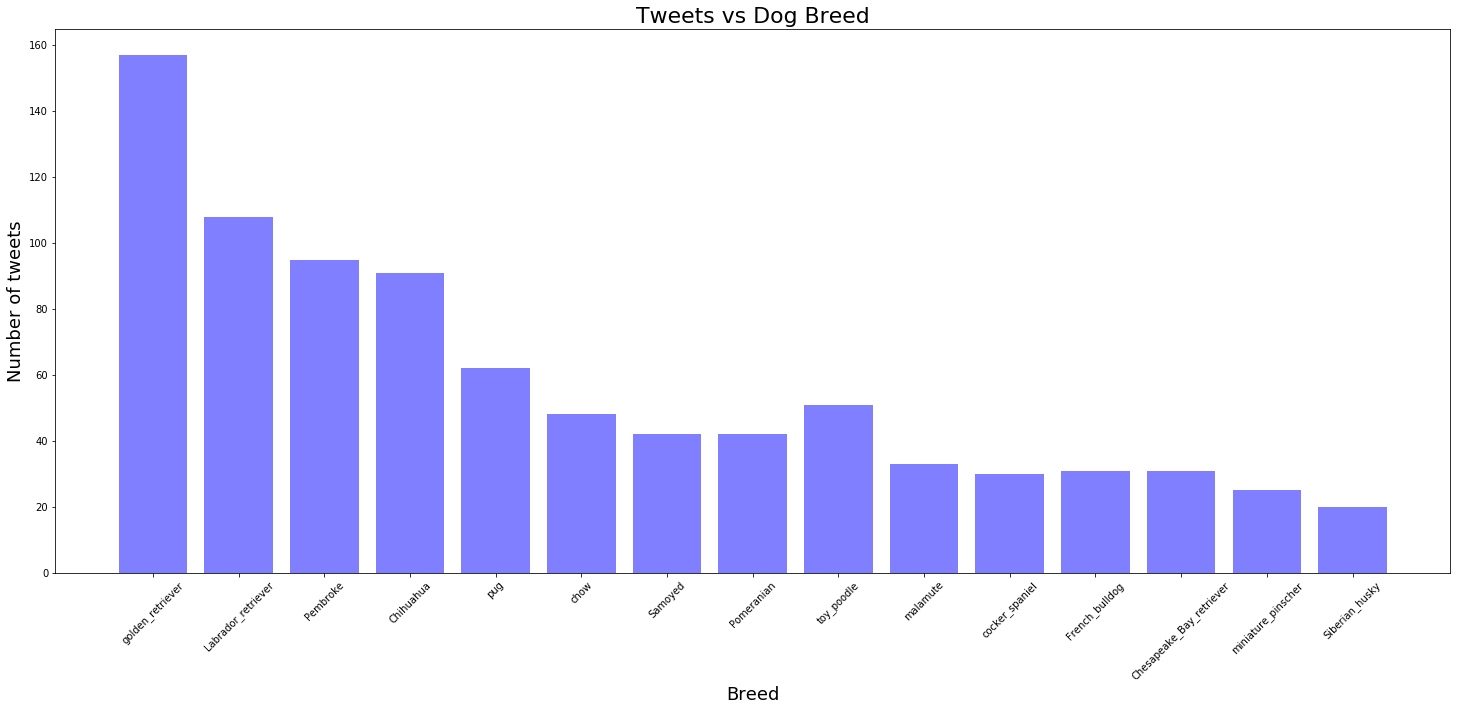

In [548]:
# There are so many dogs, lets plot the top 15
plt.figure(figsize=(25,10));
plt.bar(height = list(dogs.values())[0:15], x = list(dogs.keys())[0:15], alpha = .5, color = 'b');
plt.title('Tweets vs Dog Breed',{'fontsize':22});
plt.xlabel('Breed',{'fontsize':18});
plt.ylabel('Number of tweets',{'fontsize':18});
plt.xticks(rotation=45);

> Thus we see golden retriever is clearly the most tweeted dog, with a total of 157 tweets according to our image classifier algorithm

Sticking inline with the first question, let's see if golden retrievers were also found to be the cutest dogs by looking at their ratings. To do this let's create a new column in main_df called `overall_rating` which is equal to `rating_numerator` divided by `rating_denominator`. Then we can find the average rating for each type of dog and display this in another bar graph

In [469]:
main_df['overall_rating'] = main_df['rating_numerator']/main_df['rating_denominator']

In [471]:
main_df.overall_rating.value_counts()

1.200      454
1.000      421
1.100      403
1.300      261
0.900      151
0.800      95 
0.700      51 
1.400      36 
0.500      33 
0.600      32 
0.300      19 
0.400      15 
0.200      10 
0.100      4  
0.000      2  
1.127      1  
1.350      1  
1.126      1  
0.975      1  
42.000     1  
177.600    1  
Name: overall_rating, dtype: int64

> Let's ignore the 42 and 177 results as these will skew our data way too much and are clear outliers. Create a new dataframe called `ratings_df` that contains this informations

In [475]:
ratings_df = main_df[(main_df.overall_rating != 42) & (main_df.overall_rating != 177.6)].copy()
ratings_df.overall_rating.value_counts()

1.200    454
1.000    421
1.100    403
1.300    261
0.900    151
0.800    95 
0.700    51 
1.400    36 
0.500    33 
0.600    32 
0.300    19 
0.400    15 
0.200    10 
0.100    4  
0.000    2  
1.127    1  
1.350    1  
0.975    1  
1.126    1  
Name: overall_rating, dtype: int64

In [589]:
# Make copies of each list of dog breed for each associated 'p' value
rating_list1 = dogs1.copy()
rating_list2 = dogs2.copy()
rating_list3 = dogs3.copy()

# Loop through each rating list. Add the mean count for each dog to the to value section in the dict
for i in rating_list:
    rating_list1[i] = ratings_df[(ratings_df.p1 == i) & (ratings_df.p1_dog == True)]['overall_rating'].mean()
for i in rating_list2:
    rating_list2[i] = ratings_df[(ratings_df.p2 == i) & (ratings_df.p2_dog == True) & (ratings_df.p1_dog == False)]['overall_rating'].mean()
for i in rating_list3:
    rating_list3[i] = ratings_df[(ratings_df.p3 == i) & (ratings_df.p3_dog == True) & (ratings_df.p2_dog == False) & (ratings_df.p1_dog == False)]['overall_rating'].mean()
rating_list = rating_list1.copy()

# Add together rating_list2's count with rating_list1's. Will have to use dogs(1 or 2) to make sure you keep track
# of how many dogs was used in each average
for i in rating_list2:
    if i in rating_list:
        rating_list[i] = (rating_list1[i]*dogs1[i] + rating_list2[i]*dogs2[i])/(dogs1[i]+dogs2[i])
    else:
        dogs.update( {i : rating_list2[i]} )

# Add together rating_list3's count with rating_list's. Will have to use dogs(half or 3) to make sure you keep track
# of how many dogs was used in each average
for i in rating_list3:
    if i in rating_list:
        rating_list[i] = (rating_list[i]*(dogs_half[i]) + rating_list3[i]*dogs3[i])/(dogs3[i]+dogs_half[i])
    else:
        rating_list.update( {i : rating_list3[i]} )


In [590]:
# Make sure our data looks right
rating_list

{'golden_retriever': 1.1614649681528655,
 'Labrador_retriever': 1.119444444444444,
 'Pembroke': 1.1410526315789473,
 'Chihuahua': 1.0549450549450552,
 'pug': 1.0241935483870965,
 'chow': 1.1416666666666673,
 'Samoyed': 1.1690476190476193,
 'Pomeranian': 1.092261904761905,
 'toy_poodle': 1.1039215686274513,
 'malamute': 1.087878787878788,
 'cocker_spaniel': 1.1333333333333333,
 'French_bulldog': 1.1193548387096774,
 'Chesapeake_Bay_retriever': 1.0838709677419358,
 'miniature_pinscher': 1.0,
 'Siberian_husky': 1.13,
 'German_shepherd': 1.1,
 'Staffordshire_bullterrier': 1.0761904761904764,
 'Eskimo_dog': 1.1409090909090909,
 'Maltese_dog': 0.9526315789473683,
 'Shetland_sheepdog': 1.0526315789473681,
 'Shih-Tzu': 1.0350000000000001,
 'beagle': 1.0150000000000001,
 'Cardigan': 1.1142857142857143,
 'Rottweiler': 1.1105263157894734,
 'kuvasz': 1.079222222222222,
 'Lakeland_terrier': 1.0444444444444443,
 'Italian_greyhound': 1.0,
 'Great_Pyrenees': 1.1466666666666667,
 'West_Highland_white_t

In [598]:
import operator
sorted_x = sorted(rating_list.items(), key=operator.itemgetter(1), reverse = True)
sorted_x

[('Irish_setter', 4),
 ('Weimaraner', 4),
 ('Tibetan_terrier', 4),
 ('Gordon_setter', 4),
 ('Tibetan_mastiff', 4),
 ('Saluki', 4),
 ('keeshond', 4),
 ('bluetick', 4),
 ('Rhodesian_ridgeback', 4),
 ('Brabancon_griffon', 3),
 ('Greater_Swiss_Mountain_dog', 3),
 ('cairn', 3),
 ('briard', 3),
 ('Afghan_hound', 3),
 ('Irish_water_spaniel', 3),
 ('curly-coated_retriever', 3),
 ('Leonberg', 3),
 ('komondor', 3),
 ('Welsh_springer_spaniel', 2.525),
 ('giant_schnauzer', 2.5),
 ('Scottish_deerhound', 2.45),
 ('wire-haired_fox_terrier', 2),
 ('black-and-tan_coonhound', 2),
 ('Appenzeller', 2),
 ('Sussex_spaniel', 2),
 ('Australian_terrier', 2),
 ('toy_terrier', 1.6333333333333335),
 ('Bouvier_des_Flandres', 1.3),
 ('Border_terrier', 1.2142857142857142),
 ('Samoyed', 1.1690476190476193),
 ('golden_retriever', 1.1614649681528655),
 ('Great_Pyrenees', 1.1466666666666667),
 ('Norfolk_terrier', 1.1428571428571428),
 ('chow', 1.1416666666666673),
 ('Pembroke', 1.1410526315789473),
 ('Eskimo_dog', 1.140

> So technically we see that the `irish_setter` had the highest rating. But there was only one rating for this animal. Let's drop all ratings with less than 5 counts, as these results aren't reliable

In [599]:
bad_dogs = []
for i in dogs:
    if dogs[i] < 5:
        bad_dogs.append(i)

In [600]:
for i in bad_dogs:
    if i in rating_list:
        del rating_list[i]

In [601]:
# Sort Data
sorted_ratings = sorted(rating_list.items(), key=operator.itemgetter(1), reverse = True)
sorted_ratings

[('Border_terrier', 1.2142857142857142),
 ('Samoyed', 1.1690476190476193),
 ('golden_retriever', 1.1614649681528655),
 ('Great_Pyrenees', 1.1466666666666667),
 ('Norfolk_terrier', 1.1428571428571428),
 ('chow', 1.1416666666666673),
 ('Pembroke', 1.1410526315789473),
 ('Eskimo_dog', 1.1409090909090909),
 ('cocker_spaniel', 1.1333333333333333),
 ('Doberman', 1.1333333333333333),
 ('kelpie', 1.1307692307692307),
 ('Siberian_husky', 1.13),
 ('Bernese_mountain_dog', 1.1272727272727272),
 ('Labrador_retriever', 1.119444444444444),
 ('French_bulldog', 1.1193548387096774),
 ('Cardigan', 1.1142857142857143),
 ('Rottweiler', 1.1105263157894734),
 ('Blenheim_spaniel', 1.1099999999999999),
 ('Old_English_sheepdog', 1.1066666666666667),
 ('toy_poodle', 1.1039215686274513),
 ('German_shepherd', 1.1),
 ('Pekinese', 1.0999999999999999),
 ('schipperke', 1.0923076923076922),
 ('Pomeranian', 1.092261904761905),
 ('Norwegian_elkhound', 1.090909090909091),
 ('collie', 1.0909090909090908),
 ('malamute', 1.0

In [612]:
# Sort into 2 lists
x_breed = []
y_rating = []
for i in sorted_ratings:
    x_breed.append(i[0])
    y_rating.append(i[1])

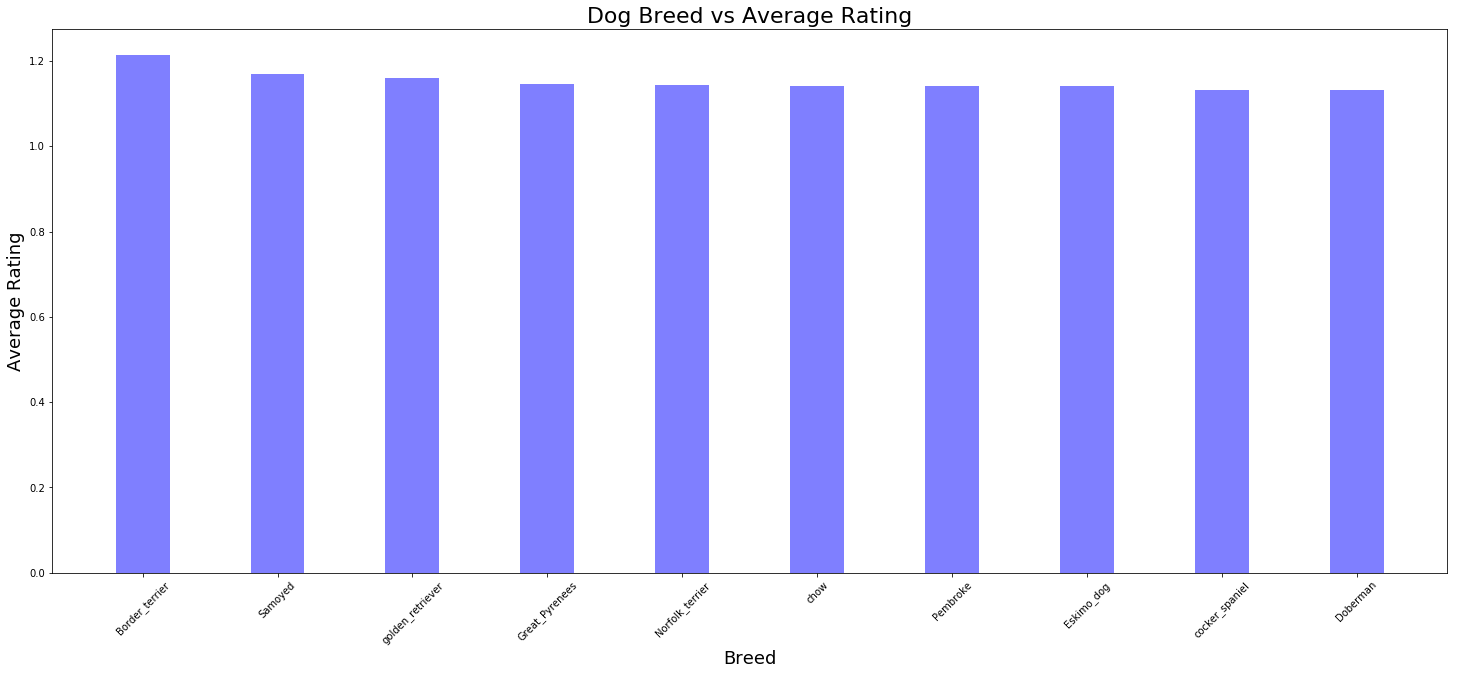

In [610]:
# Plot data again
# Now we can plot the data
plt.figure(figsize=(25,10));
plt.bar(height = y_rating[0:10], x = x_breed[0:10], alpha = .5, color = 'b',width = .4);
plt.title('Dog Breed vs Average Rating',{'fontsize':22});
plt.xlabel('Breed',{'fontsize':18});
plt.ylabel('Average Rating',{'fontsize':18});
plt.xticks(rotation=45);

##### Thus we see the highest rated dog on average (with a minimum of 5 ratings) was the <u>Border_terrier</u> with a rating of 1.214! 
(There were 7 total ratings for this breed)

<br><br>
Now let's answer the third question and see how ratings have changed overtime

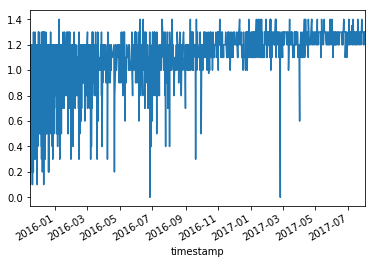

In [625]:
# Use main_df as the data set for this analysis. (it contains the overall rating column and the two spike anomoly's
# that we need to drop eventually)

df_time_graph = main_df[['timestamp','overall_rating']]
df_time_graph = df_time_graph[(df_time_graph.overall_rating != 42) & (df_time_graph.overall_rating != 177.6)].copy()
df_time_graph.set_index('timestamp', inplace=True)
df_time_graph['overall_rating'].plot(label='Rating')

##### Thus we see overtime people actually look like they've become less negative with their ratings, giving hardly any ratings below a value of 10/10 (or 1). This is different from earlier (near 2016) when the ratings given ranged from about .2 to 1.0